# Data Pre-Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection 
from sklearn import metrics  

### Data Loading 

In [2]:
train = pd.read_csv('train_selected.csv')
train.head()

,id,cycle,s1,s2,s3,s4,ttf,label_bnc
0,1,1,1400.60,554.36,47.47,521.66,191,0
1,1,2,1403.14,553.75,47.49,522.28,190,0
2,1,3,1404.20,554.26,47.27,522.42,189,0
3,1,4,1401.87,554.45,47.13,522.86,188,0
4,1,5,1406.22,554.00,47.28,522.19,187,0


## Relationships between features

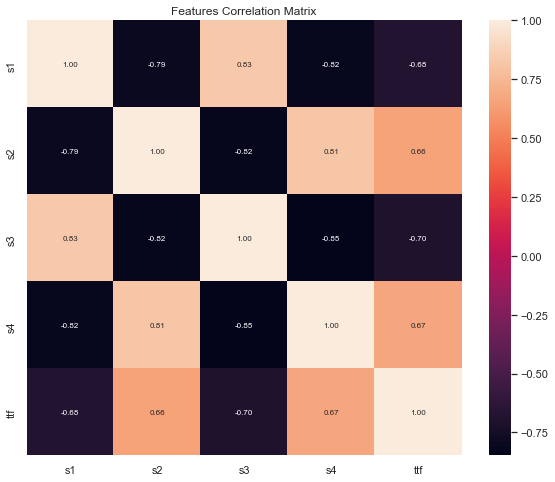

In [3]:
# Correlation matrix
features=['s1', 's2', 's3', 's4','ttf']
cm = np.corrcoef(train[features].values.T)
sns.set(font_scale=1.0)
fig = plt.figure(figsize=(10, 8))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=features, xticklabels=features)
plt.title('Features Correlation Matrix')
plt.show()

array([[<AxesSubplot:xlabel='s1', ylabel='s1'>,
        <AxesSubplot:xlabel='s2', ylabel='s1'>,
        <AxesSubplot:xlabel='s3', ylabel='s1'>,
        <AxesSubplot:xlabel='s4', ylabel='s1'>,
        <AxesSubplot:xlabel='ttf', ylabel='s1'>],
       [<AxesSubplot:xlabel='s1', ylabel='s2'>,
        <AxesSubplot:xlabel='s2', ylabel='s2'>,
        <AxesSubplot:xlabel='s3', ylabel='s2'>,
        <AxesSubplot:xlabel='s4', ylabel='s2'>,
        <AxesSubplot:xlabel='ttf', ylabel='s2'>],
       [<AxesSubplot:xlabel='s1', ylabel='s3'>,
        <AxesSubplot:xlabel='s2', ylabel='s3'>,
        <AxesSubplot:xlabel='s3', ylabel='s3'>,
        <AxesSubplot:xlabel='s4', ylabel='s3'>,
        <AxesSubplot:xlabel='ttf', ylabel='s3'>],
       [<AxesSubplot:xlabel='s1', ylabel='s4'>,
        <AxesSubplot:xlabel='s2', ylabel='s4'>,
        <AxesSubplot:xlabel='s3', ylabel='s4'>,
        <AxesSubplot:xlabel='s4', ylabel='s4'>,
        <AxesSubplot:xlabel='ttf', ylabel='s4'>],
       [<AxesSubplot:xlabel='s1'

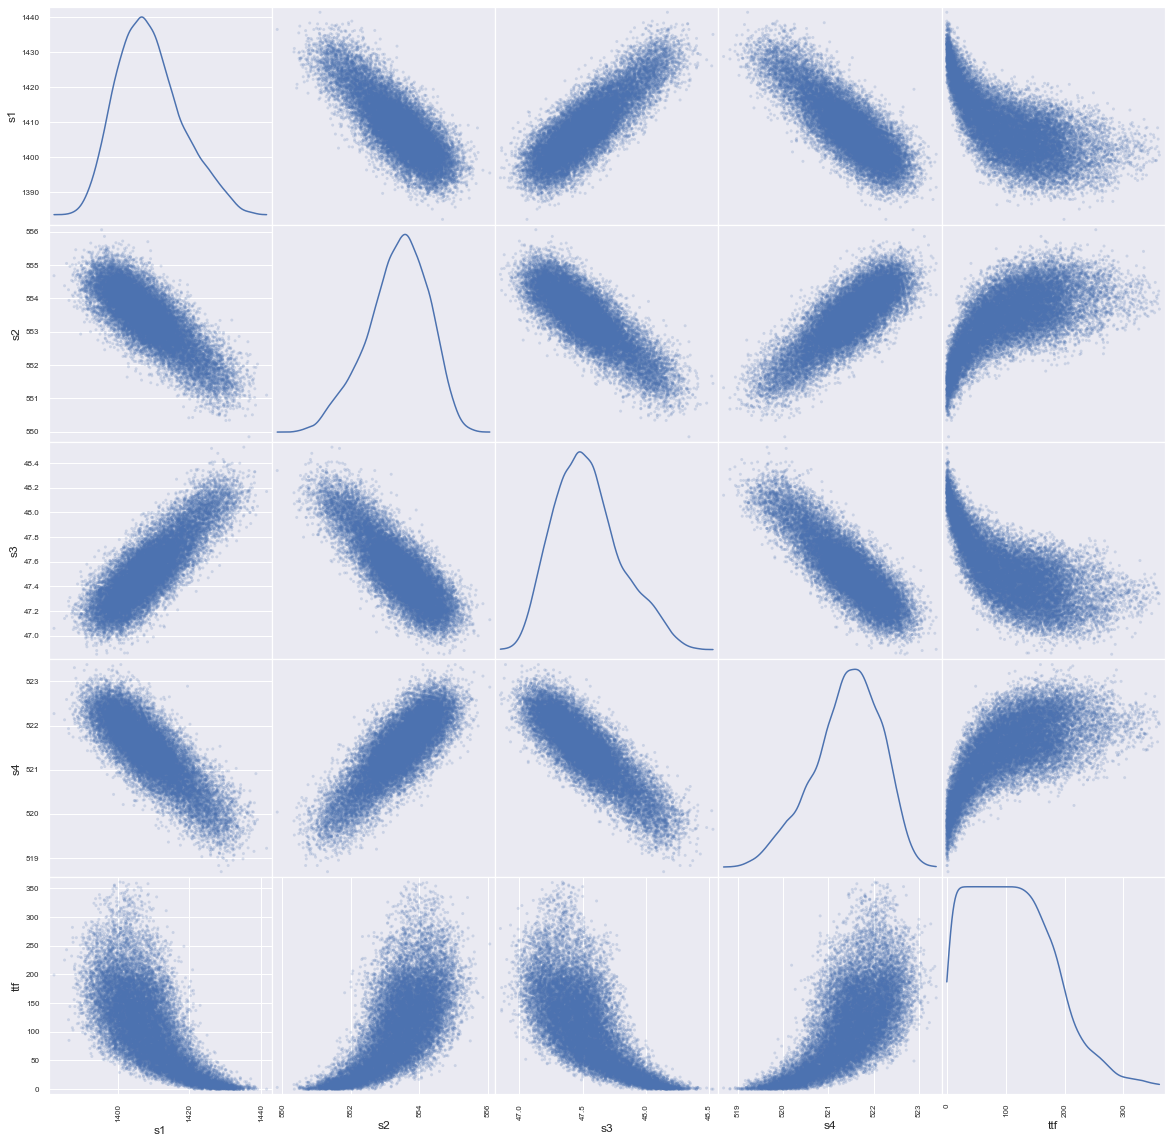

In [4]:
# Scatter matrix to display relatiohships and distribution among features 
pd.plotting.scatter_matrix(train[features], alpha=0.2, figsize=(20, 20), diagonal='kde')

In [5]:
# Exploration of each feature invidually

def analysis(s, e):
    
    """4 main graphs for a single feature.
    
        plot1: histogram 
        plot2: boxplot 
        plot3: line plot (time series sensor over cycle)
        plot4: scatter plot sensor over ttf

        s (str): The column name of the feature to be plotted.
        e (int): The number of random engines to be plotted for plot 3. Range from 1 -100, 0:all engines, 100: all engines.    
    """
    
    fig = plt.figure(figsize=(10, 8))

    sub1 = fig.add_subplot(221) 
    sub1.set_title(s +' Histogram') 
    sub1.set_xlabel(s +' values')
    sub1.set_ylabel('Number of values')
    sub1.hist(train[s])

    sub2 = fig.add_subplot(222)
    sub2.set_title(s +' Boxplot')
    sub2.boxplot(train[s])
    
    if e > 100 or e <= 0:
        select_engines = list(pd.unique(train.id))
    else:
        select_engines = np.random.choice(range(1,101), e, replace=False)
        
    sub3 = fig.add_subplot(223)
    sub3.set_title('Time series: ' + s +' / cycle')
    sub3.set_xlabel('cycle')
    sub3.set_ylabel(s)
    for i in select_engines:
        df = train[['cycle', s]][train.id == i]
        sub3.plot(df['cycle'],df[s])
    
    sub4 = fig.add_subplot(224)
    sub4.set_title("Scatter: "+ s + " / ttf")
    sub4.set_xlabel('ttf')
    sub4.set_ylabel(s)
    sub4.scatter(train['ttf'],train[s])


    plt.tight_layout()
    plt.show()

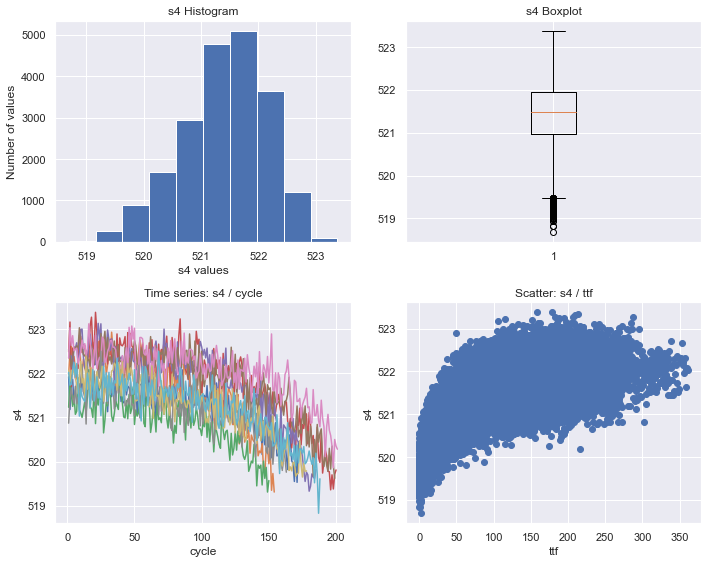

In [6]:
analysis("s4", 10)

In [7]:
# Explore the time series plot for a sensor selecting random sample engines

def plot_sensor_per_engine(s):
    
    """Time series of a single sensor for 10 random sample engines.
    
        Args:
        s (str): The column name of the sensor to be plotted.
    """
    
    fig, axes = plt.subplots(10, 1, sharex=True, figsize = (15, 15))
    fig.suptitle(' Time series : '+s+' / cycle', fontsize=15)
    
    select_engines = np.random.choice(range(1,101), 10, replace=False).tolist()
    
    for e_id in select_engines:
        df = train[['cycle', s]][train.id == e_id]
        i = select_engines.index(e_id)
        axes[i].plot(df['cycle'],df[s])
        axes[i].set_ylabel('engine ' + str(e_id))
        axes[i].set_xlabel('cycle')

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

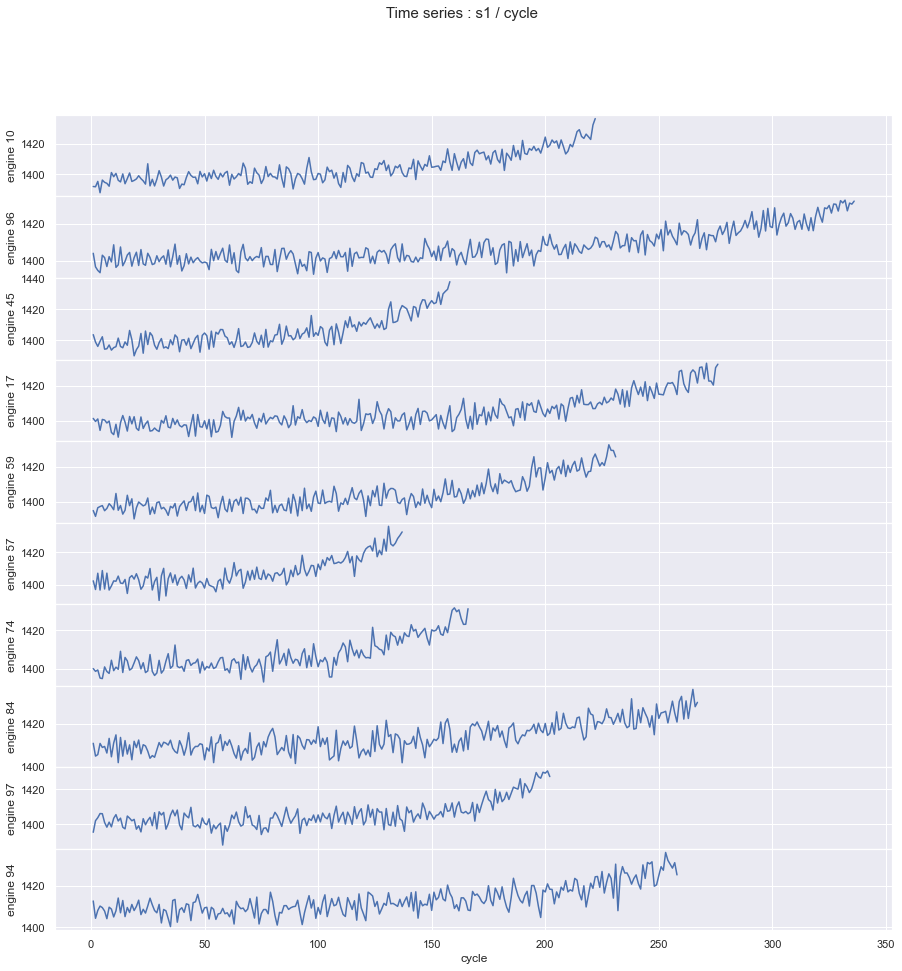

In [8]:
plot_sensor_per_engine('s1')